# Q1. Monte Carlo Valuation and Sensitivities of Vanilla Options

In [1]:
import pandas as pd
import numpy as np
from math import e, pi
from py_vollib.black_scholes import black_scholes
from py_vollib.black_scholes.greeks.analytical import gamma
import matplotlib.pyplot as plt
from scipy.stats import norm
N = norm.cdf  # will be later used to calculate call option and delta
N_diff = norm.pdf

Generation of random normals: $ \{z_i\}_n $ with n ranging in $ 10^3, 10^4, 10^5, 10^6 $ 

In [2]:
mu, sigma = 0, 1
np.random.seed(9323)
k = np.random.normal(mu, sigma, 1000)

np.random.seed(9323)
ten_k = np.random.normal(mu, sigma, 10000)

np.random.seed(9323)
hun_k = np.random.normal(mu, sigma, 100000)

np.random.seed(9323)
mil = np.random.normal(mu, sigma, 1000000)

## 1(a) Calculating mean and standard deviation for the sample

Mean, Std, Var for $ 10^3 $

In [3]:
#(a)
[np.mean(k), np.std(k), np.std(k) ** 2]

[0.008449842002984714, 0.9733369946347107, 0.9473849051245308]

Mean, Std, Var for $ 10^4 $

In [4]:
[np.mean(ten_k), np.std(ten_k), np.std(ten_k) ** 2]

[-0.009915282718525065, 0.9881659682151105, 0.9764719807385067]

Mean, Std, Var for $ 10^5 $

In [5]:
[np.mean(hun_k), np.std(hun_k), np.std(hun_k) ** 2]

[-0.0029723842103211596, 0.9986345863196998, 0.997271036993918]

Mean, Std, Var for $ 10^6 $

In [6]:
[np.mean(mil), np.std(mil), np.std(mil) ** 2]

[0.0008519629082273984, 1.0007259868300007, 1.0014525007168786]

The results are converging to population values adhering to LLN

## 1(b) Using the generated $ \{z_i\}_n $ sequences to generate $ \{S_{T,i}\}_n $ using the formula $ S_T = S_t exp ((r - y - \frac{\sigma^2}{2})\Delta_{t} +  {\sigma}{z_i}{\sqrt{\Delta{T}}}) $

In [7]:
#(b)
K = 3975
St = K
T_t = 1
sigma = 0.2
r = 0.048
y = 0.015
r_y = 0.048 - 0.015
ST_k = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * k)
ST_ten_k = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * ten_k)
ST_hun_k = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * hun_k)
ST_mil = K * e ** ((r_y - ((sigma ** 2)/2))*T_t + sigma * ((T_t) ** 0.5) * mil)

Mean, Std, Log mean, Log Std for $ 10^3 $

In [8]:
[np.mean(ST_k), np.std(ST_k), np.mean(np.log(ST_k)), np.std(np.log(ST_k)) ** 2]

[4111.165411639323, 812.8616930660112, 8.30246999548903, 0.03789539620498124]

Mean, Std, Log mean, Log Std for $ 10^4 $

In [9]:
[np.mean(ST_ten_k), np.std(ST_ten_k), np.mean(np.log(ST_ten_k)), np.std(np.log(ST_ten_k)) ** 2]

[4098.207995231363, 816.7164398825205, 8.298796970544727, 0.039058879229540266]

Mean, Std, Log mean, Log Std for $ 10^5 $

In [10]:
[np.mean(ST_hun_k), np.std(ST_hun_k), np.mean(np.log(ST_hun_k)), np.std(np.log(ST_hun_k)) ** 2]

[4105.685840798335, 828.1501258186012, 8.300185550246368, 0.03989084147975672]

Mean, Std, Log mean, Log Std for $ 10^6 $

In [11]:
[np.mean(ST_mil), np.std(ST_mil), np.mean(np.log(ST_hun_k)), np.std(np.log(ST_hun_k)) ** 2]

[4109.183739562895, 830.702119679717, 8.300185550246368, 0.03989084147975672]

In [12]:
ST = St * e ** (r_y * T_t)
mu = ST
def tstat(mu, sample_mu, sample_std, sample_size):
    return (sample_mu - mu)/(sample_std/(sample_size ** 0.5))
[tstat(mu, np.mean(ST_k), np.std(ST_k), 1000), 
 tstat(mu, np.mean(ST_ten_k), np.std(ST_ten_k), 10000), 
 tstat(mu, np.mean(ST_hun_k), np.std(ST_hun_k), 100000), 
 tstat(mu, np.mean(ST_mil), np.std(ST_mil), 1000000)]

[0.1090069748758992,
 -1.2434423695802501,
 -1.022419097507512,
 0.9875333880472823]

##### T-Stats are pretty low, so alternative hypothesis H: Sample differs from Population cannot be accepted

## 1(c) Simulating call option estimation using given formula $ [S_T - K]^{+}{e^{-r{\Delta}{T}}} $

In [13]:
ct_k = (ST_k - K) / (e ** (r * T_t))
ct_ten_k = (ST_ten_k - K) / (e ** (r * T_t))
ct_hun_k = (ST_hun_k - K) / (e ** (r * T_t))
ct_mil = (ST_mil - K) / (e ** (r * T_t))
ct_k = [max(0, ct) for ct in ct_k]
ct_ten_k = [max(0, ct) for ct in ct_ten_k]
ct_hun_k = [max(0, ct) for ct in ct_hun_k]
ct_mil = [max(0, ct) for ct in ct_mil]

print("Standard errors") 
[np.std(ct_k)/(1000 ** 0.5), np.std(ct_ten_k)/(10000 ** 0.5), 
 np.std(ct_hun_k)/(100000 ** 0.5), np.std(ct_mil)/(1000000 ** 0.5)]

Standard errors


[17.494997473473575, 5.42738868252891, 1.751538053942455, 0.556966364228355]

The call value standard errors do to reduce/converge when sample size increases hence CLT is applicable

## 1(d) Antithetic variates
#### First stock price given by $ S_{T,1} = S_t exp ((r - y - \frac{\sigma^2}{2})\Delta{T} + {\sigma}{z_i}{\sqrt{\Delta{T}}}) $
#### Second stock price given by $ S_{T,2} = S_t exp ((r - y - \frac{\sigma^2}{2})\Delta{T} - {\sigma}{z_i}{\sqrt{\Delta{T}}}) $
#### Call option value given by $ \frac{1}{2} [S_{T,1} - K]^{+}{e^{-r{\Delta}{T}}} +  \frac{1}{2} [S_{T,2} - K]^{+}{e^{-r{\Delta}{T}}}  $

In [14]:
ST_k2 = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t - sigma * ((T_t) ** 0.5) * k)
ST_ten_k2 = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t - sigma * ((T_t) ** 0.5) * ten_k)
ST_hun_k2 = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t - sigma * ((T_t) ** 0.5) * hun_k)
ST_mil2 = K * e ** ((r_y - ((sigma ** 2)/2)) *T_t - sigma * ((T_t) ** 0.5) * mil)

ct_k2 = (ST_k2 - K) / (e ** (r * T_t))
ct_ten_k2 = (ST_ten_k2 - K) / (e ** (r * T_t))
ct_hun_k2 = (ST_hun_k2 - K) / (e ** (r * T_t))
ct_mil2 = (ST_mil2 - K) / (e ** (r * T_t))

ct_k2 = [0.5 * (max(0, ct_k2[i]) + ct_k[i]) for i in range(1000)]
ct_ten_k2 = [0.5 * (max(0, ct_ten_k2[i]) + ct_ten_k[i]) for i in range(10000)]
ct_hun_k2 = [0.5 * (max(0, ct_hun_k2[i]) + ct_hun_k[i]) for i in range(100000)]
ct_mil2 = [0.5 * (max(0, ct_mil2[i]) + ct_mil[i]) for i in range(1000000)]

print("Standard errors using antithetic variates") 
[np.std(ct_k2)/(1000 ** 0.5), np.std(ct_ten_k2)/(10000 ** 0.5),
 np.std(ct_hun_k2)/(100000 ** 0.5), np.std(ct_mil2)/(1000000 ** 0.5)]

Standard errors using antithetic variates


[9.25920278885033, 2.8755305582664565, 0.9175459280419552, 0.2908746097107192]

There seems to be a significant difference in the total standard error using antithetic variates. Visualized comparison of the two simulations of call option values

D:\Applications\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


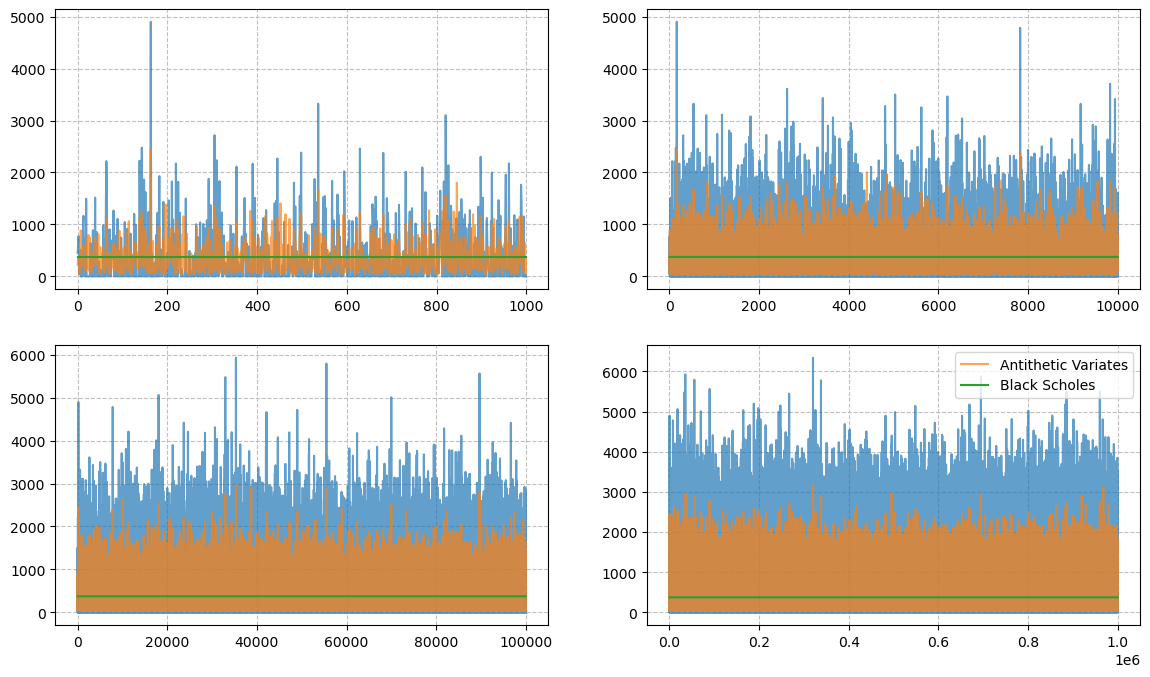

In [15]:
d1 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) + ((sigma * (T_t ** 0.5))/2)
d2 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) - ((sigma * (T_t ** 0.5))/2)

call = (St * (e ** ((0-y) * T_t)) * N(d1)) - (K * (e ** ((0-r) * T_t)) * N(d2))

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.grid(linestyle="--", color="silver")
plt.plot(ct_k, alpha=0.7)
plt.plot(ct_k2, alpha=0.7, label="Antithetic Variates")
plt.plot([call for i in range(1000)], label="Black Scholes")

plt.subplot(2,2,2)
plt.grid(linestyle="--", color="silver")
plt.plot(ct_ten_k, alpha=0.7)
plt.plot(ct_ten_k2, alpha=0.7, label="Antithetic Variates")
plt.plot([call for i in range(10000)], label="Black Scholes")

plt.subplot(2,2,3)
plt.grid(linestyle="--", color="silver")
plt.plot(ct_hun_k, alpha=0.7)
plt.plot(ct_hun_k2, alpha=0.7, label="Antithetic Variates")
plt.plot([call for i in range(100000)], label="Black Scholes")

plt.subplot(2,2,4)
plt.grid(linestyle="--", color="silver")
plt.plot(ct_mil, alpha=0.7)
plt.plot(ct_mil2, alpha=0.7, label="Antithetic Variates")
plt.plot([call for i in range(1000000)], label="Black Scholes")

plt.legend()
plt.show()

Clearly evident that antithetic variates drastically reduces outliers in the sample and brings the mean closer to implied call value. Following are the correlations between antithetic and non-antithetic payoffs.

Implied correlation matrix between BBMS and antithetic for $ n = 10^3 $

In [16]:
np.corrcoef(ct_k, ct_k2)

array([[1.        , 0.54742907],
       [0.54742907, 1.        ]])

Implied correlation matrix between BBMS and antithetic for $ n = 10^4 $

In [17]:
np.corrcoef(ct_ten_k, ct_ten_k2)

array([[1.        , 0.50693469],
       [0.50693469, 1.        ]])

Implied correlation matrix between BBMS and antithetic for $ n = 10^5 $

In [18]:
np.corrcoef(ct_hun_k, ct_hun_k2)

array([[1.        , 0.51897894],
       [0.51897894, 1.        ]])

Implied correlation matrix between BBMS and antithetic for $ n = 10^6 $

In [19]:
np.corrcoef(ct_mil, ct_mil2)

array([[1.        , 0.52383845],
       [0.52383845, 1.        ]])

Roughly all the antithetic variates and bare bones monte carlo payoffs are correlated at/around 50%

#### Calculating efficiency ratios of antithetic to BBMC in the order $ n = 10^3, 10^4, 10^5, 10^6 $ respectively

In [20]:
eff_ratio1 = (np.std(ct_k) ** 2)/((np.std(ct_k2) ** 2) * 2)
eff_ratio2 = (np.std(ct_ten_k) ** 2)/((np.std(ct_ten_k2) ** 2) * 2)
eff_ratio3 = (np.std(ct_hun_k) ** 2)/((np.std(ct_hun_k2) ** 2) * 2)
eff_ratio4 = (np.std(ct_mil) ** 2)/((np.std(ct_mil2) ** 2) * 2)
[eff_ratio1, eff_ratio2, eff_ratio3, eff_ratio4]

[1.7850508035169628,
 1.7812130951459044,
 1.8220216553372184,
 1.8332272920444979]

As indicated by the efficiency ratios between antithetic and bare bones monte carlo, antithetic is an increasingly suitable choice with increasing sample size

#### Comparison of the effiency ratios with execution times generated by timing functions built in Python

In [21]:
from timeit import default_timer as timer
def get_time(function, n):
    start = timer()
    function(n)
    end = timer()
    return(end - start)

def bare_bones(n):
    K = 3975
    St = K
    T_t = 1
    sigma = 0.2
    r = 0.048
    y = 0.015
    r_y = 0.048 - 0.015

    np.random.seed(9323)
    z = np.random.normal(0, 1, n)
    ST = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    ct = (ST - K) / (e ** (r * T_t))
    ct = [max(0, c) for c in ct]
    return np.mean(ct)

def antithetic(n):
    K = 3975
    St = K
    T_t = 1
    sigma = 0.2
    r = 0.048
    y = 0.015
    r_y = 0.048 - 0.015

    np.random.seed(9323)
    z = np.random.normal(0, 1, n)
    ST = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    ST2 = K * e ** ((r_y - ((sigma ** 2)/2)) * T_t - sigma * ((T_t) ** 0.5) * z)
    ct = (ST - K) / (e ** (r * T_t))
    ct2 = (ST2 - K) / (e ** (r * T_t))
    ct = [0.5 * (max(0, ct2[i]) + max(0, ct[i])) for i in range(n)]

t1_k = get_time(bare_bones, 1000)
t1_ten_k = get_time(bare_bones, 10000)
t1_hun_k = get_time(bare_bones, 100000)
t1_mil = get_time(bare_bones, 1000000)


t2_k = get_time(antithetic, 1000)
t2_ten_k = get_time(antithetic, 10000)
t2_hun_k = get_time(antithetic, 100000)
t2_mil = get_time(antithetic, 1000000)

eff_ratio1 = (t1_k * (np.std(ct_k) ** 2))/((np.std(ct_k2) ** 2) * t2_k)
eff_ratio2 = (t1_ten_k * (np.std(ct_ten_k) ** 2))/((np.std(ct_ten_k2) ** 2) * t2_ten_k)
eff_ratio3 = (t1_hun_k * (np.std(ct_hun_k) ** 2))/((np.std(ct_hun_k2) ** 2) * t2_hun_k)
eff_ratio4 = (t1_mil * (np.std(ct_mil) ** 2))/((np.std(ct_mil2) ** 2) * t2_mil)
[eff_ratio1, eff_ratio2, eff_ratio3, eff_ratio4]

[4.419498072204965, 2.098356825918976, 1.5343533151086195, 1.4811306380855085]

The efficiency ratios although close to expectations are lesser than what were predicted and seem to have a slightly decreasing trend with increasing sample size. This implies algorithms to simulate have scope for improvement or there are computational constraints.

## 1(e) Finite Difference Sensitivities $ \Delta_+ \space \Delta_- \space \Delta_c \space \Gamma_c  $

### Following wrapper functions have the descriptions as stated 

### 1. C
#### Helps us decide whether to run bare bones or antithetic to calculate call option value

### 2. bare_bones
#### Runs BBMC to calculate call option from passed $ S_t $

### 3. antithetic
#### Runs antithetic MC to calculate call option from passed $ S_t $

### 4. calc_sensitivities
#### Calculates the deltas and gammas as given in lecture notes

### 5. bsm_delta
#### Calculates the delta using black scholes merton

### 6. bsm_gamma
#### Calculates the gamma using black scholes merton

### 7. N_diff
#### Calculates N'(d1) required for gamma calculation

### 8. plot_sensitivities
#### Collocates all the functional logic to generate the sensitivities and plot them


In [52]:
# (e) Defining some wrapper functions to help us
np.random.seed(9323)
z = np.random.normal(0, 1, 1000)

def C(S, function):
    return function(S)

def bare_bones(S):
    global K
    St = S
    global T_t
    global sigma
    global r
    global y
    global r_y
    global z

    ST = St * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    ct = (ST - K) / (e ** (r * T_t))
    ct = [max(0, c) for c in ct]
    return np.mean(ct)

def antithetic(S):
    global K
    St = S
    global T_t
    global sigma
    global r
    global y
    global r_y
    global z

    ST = St * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    ST2 = St * e ** ((r_y - ((sigma ** 2)/2)) * T_t - sigma * ((T_t) ** 0.5) * z)
    ct = (ST - K) / (e ** (r * T_t))
    ct2 = (ST2 - K) / (e ** (r * T_t))
    ct = [0.5 * (max(0, ct2[i]) + max(0, ct[i])) for i in range(len(ct))]
    return np.mean(ct)


def calc_sensitivities(S, bump, f):
    e = bump
    S0 = S
    S_plus = S + e*S
    S_minus = S - e*S
    C0 = C(S,f)
    C_plus = C(S_plus,f)
    C_minus = C(S_minus,f)
    delta_plus = (C_plus - C0)/(S_plus - S0)
    delta_minus = (C0 - C_minus)/(S0 - S_minus)
    delta_c = (C_plus - C_minus)/(S_plus - S_minus)
    gamma_c = (C_plus + C_minus - 2*C0)/((e*S) ** 2)
    return [delta_plus, delta_minus, delta_c, gamma_c]

def bsm_delta(St):
    global K
    global T_t
    global sigma
    global r_y 
    d1 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) + ((sigma * (T_t ** 0.5))/2)
    return (e ** ((0-y) * T_t)) * N(d1)

def bsm_gamma(St):
    global K
    global T_t
    global sigma
    global r_y 
    d1 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) + ((sigma * (T_t ** 0.5))/2)
    return (e ** ((0-y) * T_t)) * N_diff(d1) / (St * sigma * (T_t ** 0.5))

def plot_sensitivities(bump_size, mc_type):
    global K
    global T_t
    global sigma
    global r
    global y
    global r_y
    global z
    
    S0 = K / (e ** (2 * sigma * (T_t ** 0.5)))
    S_max = K * (e ** (2 * sigma * (T_t ** 0.5)))
    delta_plus = []
    delta_minus = []
    delta_c = []
    gamma_c = []
    delta_bsm = []
    gamma_bsm = []
    S = []

    bump = bump_size
    while(S0 <= S_max):
        S.append(S0)
        sens = calc_sensitivities(S0, bump, mc_type)
        delta_plus.append(sens[0])
        delta_minus.append(sens[1])
        delta_c.append(sens[2])
        gamma_c.append(sens[3])
        if mc_type == bbmc_exotic:
            delta_bsm.append(bsm_delta_exotic(S0))
            gamma_bsm.append(bsm_gamma_exotic(S0))
        elif mc_type == cv_exotic:
            delta_bsm.append(bsm_delta(S0) + cv_delta(S0))
            gamma_bsm.append(bsm_gamma(S0) + cv_gamma(S0))
        else:
            delta_bsm.append(bsm_delta(S0))
            gamma_bsm.append(bsm_gamma(S0)) #gamma('c', S0, K, T_t, r-y, sigma)
            
        S0 = S0 + bump*S0
        
    
    plt.figure(figsize=(13,7))
    
    plt.subplot(1,2,1)
    plt.title("Delta plot vs BSM")
    plt.grid(linestyle="--", color="silver")
    plt.xlabel("S(t)")
    plt.plot(S, delta_plus, alpha=0.7, label="+")
    plt.plot(S, delta_minus, alpha=0.7, label="-")
    plt.plot(S, delta_c, alpha=0.7, label="c")
    plt.plot(S, delta_bsm, color="maroon", alpha=0.7, label="bsm")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("Gamma plot vs BSM")
    plt.grid(linestyle="--", color="silver")
    plt.xlabel("S(t)")
    plt.plot(S, gamma_c, alpha=0.7, label="c")
    plt.plot(S, gamma_bsm, alpha=0.7, color="maroon", label="bsm")
    plt.legend()
    
    plt.show()    

## BBMC
### Bump = 0.1

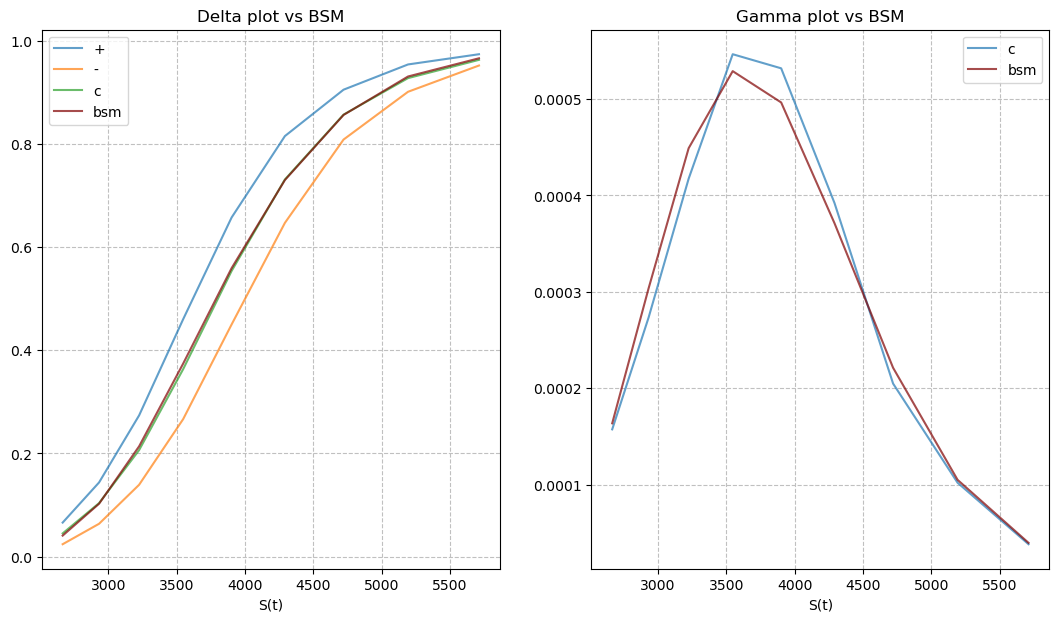

In [27]:
plot_sensitivities(0.1, bare_bones)

### Bump = 0.01

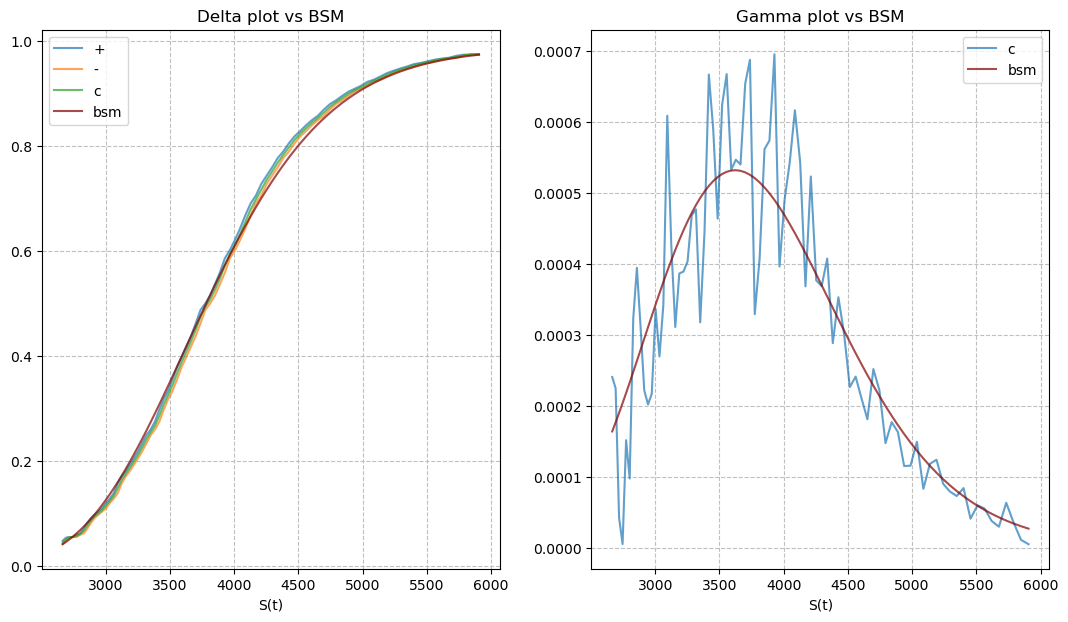

In [28]:
plot_sensitivities(0.01, bare_bones)

### Bump = 0.001

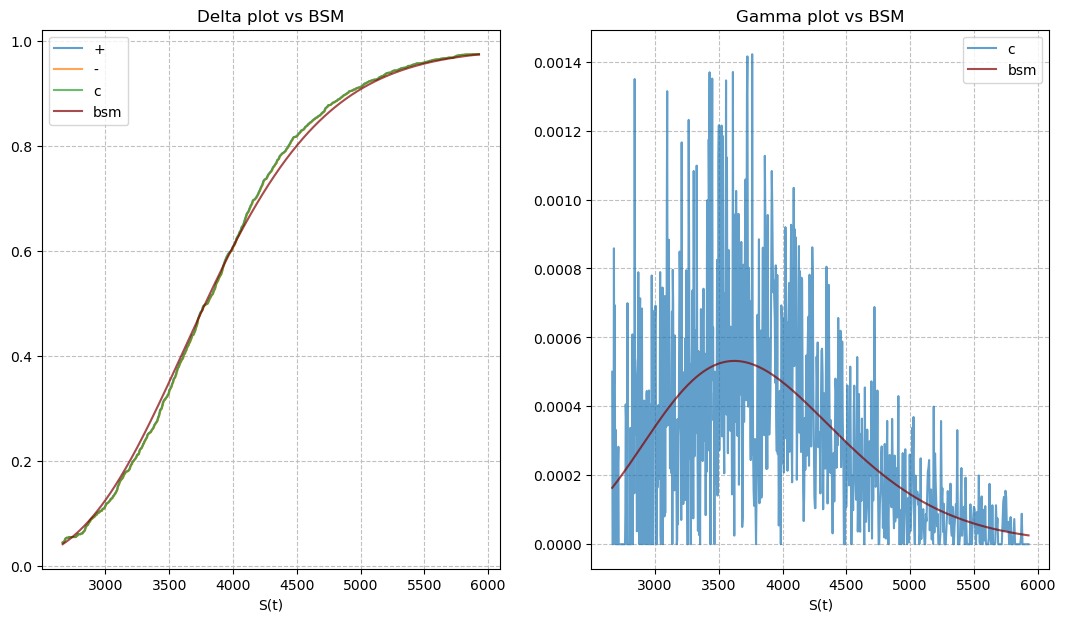

In [29]:
plot_sensitivities(0.001, bare_bones)

## Observations

### Deltas
- With bumps of size 0.1 the delta_c values more accurately align with BSM model however delta+ and delta- have a wide spread with bsm
- With bumps of size 0.01 the spreads of delta+ and delta- with bsm have considerably decreased however the delta_c spread has increased. All three simulated deltas are not very smooth unlike the bsm curve
- With bumps of size 0.001 the simulations are extremely uneven. The delta+, delta- and delta_c values seem to have converged to one single curve.

### Gamma
- With bumps of size 0.1 there is a small spread but gamma predicted values fairly align with bsm gamma
- With bumps of size 0.01 gamma_c has significant noise but the overall trend still seems to track bsm gamma
- With bumps of size 0.001 gamma_c is almost completely random with a miniscule resemblance to bsm gamma

## Antithetic Variates
### Bump = 0.1

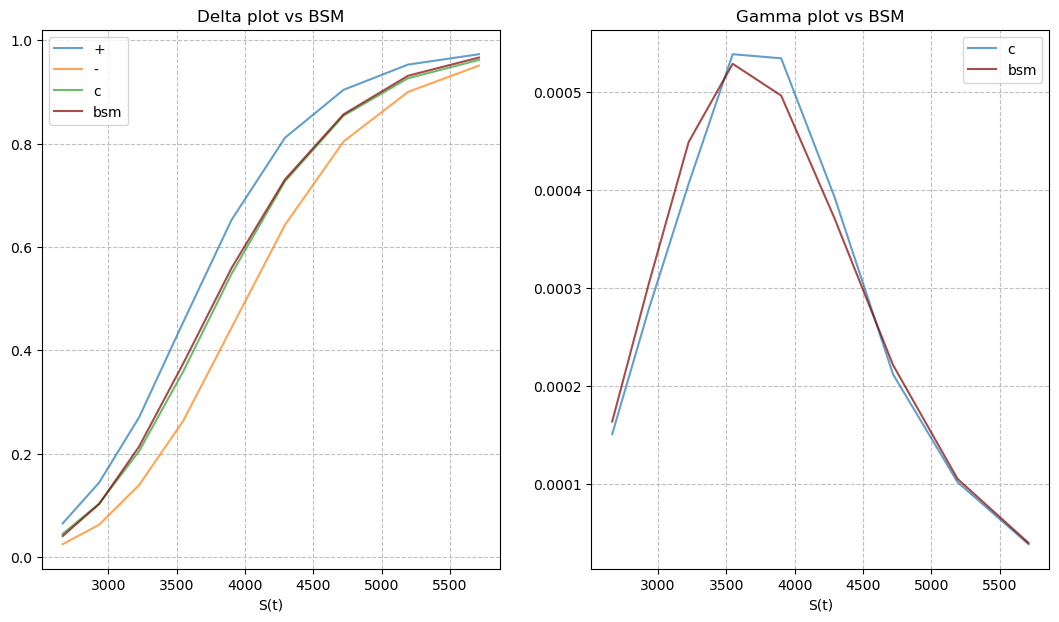

In [30]:
plot_sensitivities(0.1, antithetic)

### Bump = 0.01

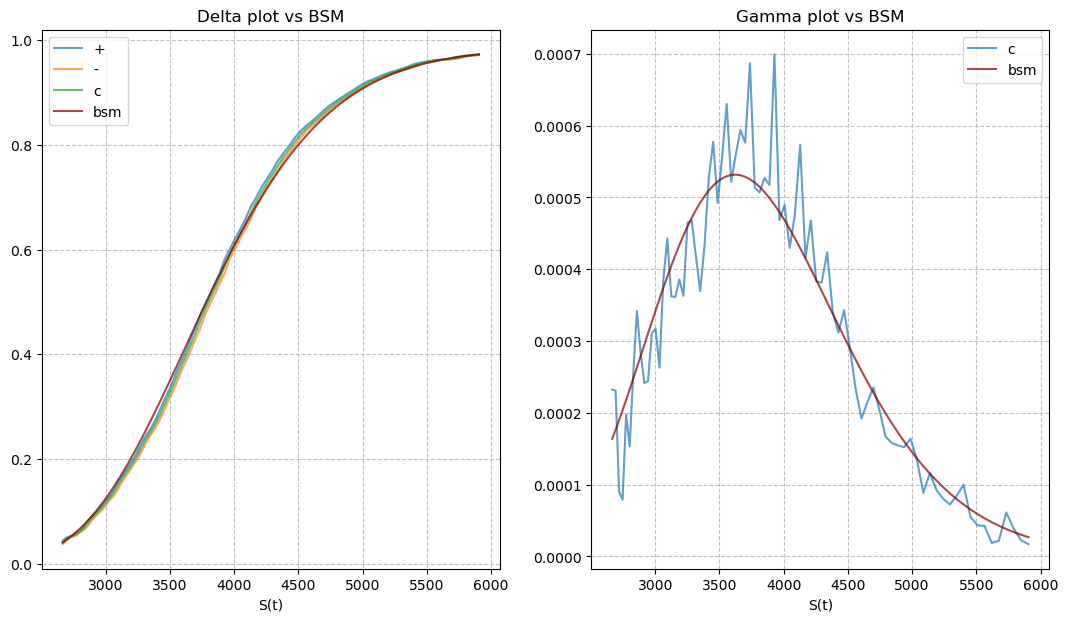

In [31]:
plot_sensitivities(0.01, antithetic)

### Bump = 0.001

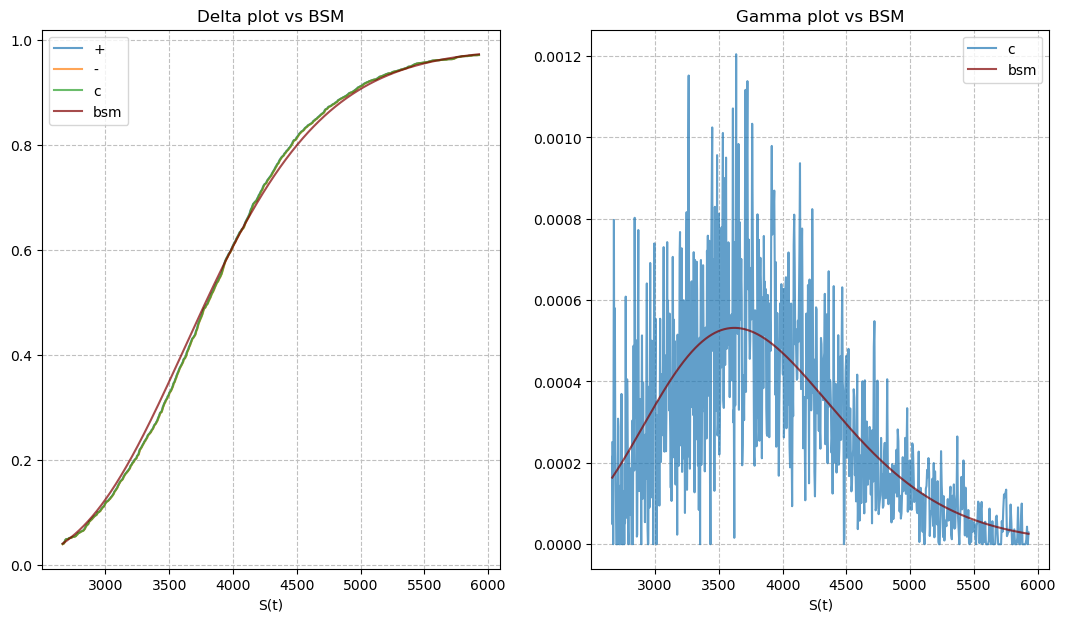

In [32]:
plot_sensitivities(0.001, antithetic)

## Observations

### Deltas
- The Deltas are have the same resemblance as that of BBMC although the bumpiness is slighlty less in comparison. (For bumps of 0.01 and 0.001)

### Gamma
- With bumps of size 0.1 the gamma_c antithetic observations are almost identical to BBMC
- With bumps of size 0.01 and 0.01 gamma_c of antithetic shows quite a bit of randomness but the variation of this randomness is noticably much lesser than BBMC.


# Q2. Valuation and Sensitivities of Exotic Option Payoff

## (a) Finding the closed form solution for given option payoff in BSM $LC_t=[K ln \frac{S_t}{K}]^+ $

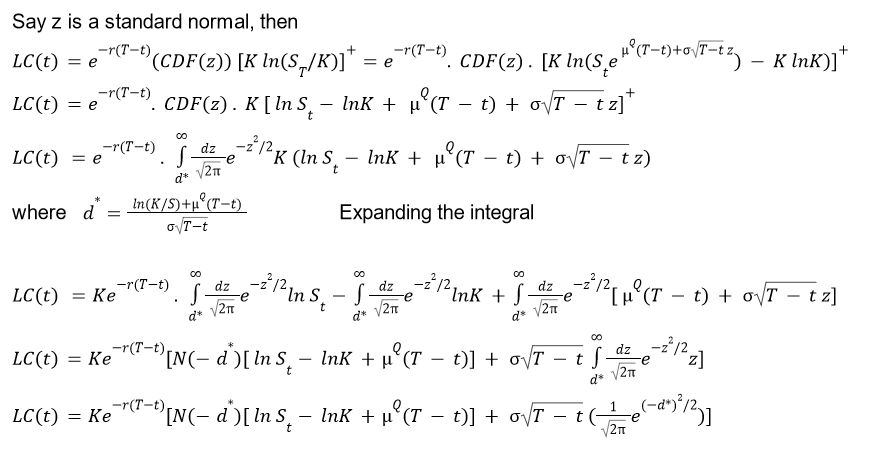

## (b) Calculating value of this option using following parameters
 K = 3975
 S(t) = K
 T-t = 1
 sigma = 0.2
 r = 0.048
 y = 0.015

In [33]:
def exotic(K, St, T_t, sigma, r, y, r_y):
    mu_q = (r - y - ((sigma ** 2)/2))
    d_star = (np.log(K/St) + mu_q*T_t) / (sigma * (T_t ** 0.5))
    LC_t = (1 - N(d_star)) * (np.log(St) - np.log(K) + mu_q*T_t)
    LC_t += (sigma * (T_t ** 0.5) * (1/((2*pi) ** 0.5)) * (e ** (((0-d_star) ** 2)/2)))
    LC_t *= (K / e ** (r * (T_t)))
    return LC_t


#bsm
d1 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) + ((sigma * (T_t ** 0.5))/2)
d2 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) - ((sigma * (T_t ** 0.5))/2)

call = (St * (e ** ((0-y) * T_t)) * N(d1)) - (K * (e ** ((0-r) * T_t)) * N(d2))
LC_t = exotic(K, St, T_t, sigma, r, y, r_y)

print("Vanilla vs Exotic")
[call, LC_t]

Vanilla vs Exotic


[374.5644796574966, 326.28463608293816]

As observed the exotic option is cheaper compared to vanilla call

## (c) Identifying a static replicating portfolio for the exotic option of vanilla calls, bonds and underlying asset using  Breeden-Litzenberger approach

$$ F_T = max[K.\ln(S/K),0]$$

Using Breeden-Litzenberger approach, we take the 1st and 2nd derivative of the payoff function:

1st Derivative:

\begin{equation}
  F'_T =
  \begin{cases}
    0 & \text{, S_T < K} \\
    \frac{K}{S} & \text{, S_T > K}
  \end{cases}
\end{equation}

The first derivative shows that there is a discontinuity (step function) in the slope of the payoff.

2nd Derivative:

\begin{equation}
  F''_T =
  \begin{cases}
    0 & \text{, S_T < K} \\
    K .\delta[\ln(S/K)] & \text{, S_T = K} \\
    \frac{-K}{S^2} & \text{, S_T > K}
  \end{cases}
\end{equation}

The weight on the delta function in the second derivative is equal to the discontinuity.

We need to LONG: $$K$$ units of vanilla call options with: $$K=S_T $$

& SHORT: $$ \frac{-K}{S^2} $$ units of vanilla call options with: $$S_T>K $$

Binary options are not needed in this portfolio as the payoff function of the Log Call option is not discontinuous.

The two obvious issues are
* Continuum of strikes: The Breeden-Litzenberger approach assumes market is complete and a continuum of strikes, which is not practical in real-world trading. In practice, options are typically available only at a finite number of strikes, and this could limit the ability to perfectly replicate the option using a combination of bonds, the underlying asset, and vanilla calls.

* Assumptions of Black-Scholes: The Breeden-Litzenberger approach relies on the assumptions of the Black-Scholes model, which may not always hold true in practice. This could lead to imperfect replication of the option.

## (d)  Effect of volatility decrease on the price of replicating portfolio
When the underlying asset volatility of an exotic option decreases, the price of the replicating portfolio counterpart created using the Breeden-Litzenberger approach may decrease as well. This is because the portfolio will require fewer options to hedge against the option's risk, which means that the cost of replicating the option will be lower. Specifically, if the volatility of the underlying asset decreases, the delta of the option will also decrease. As a result, the replicating portfolio will require fewer shares of the underlying asset and fewer options to hedge the option's risk. This reduction in the number of options required to hedge the option's risk leads to a decrease in the price of the replicating portfolio.

## (e) Simulating call option monte carlo estimation using given formula $ LC_t = e^{-r(T-t)} [K ln(\frac{S_T}{K})]^+ $

In [34]:
lc_k = [max(0, K * np.log(s/K)) / (e ** (r * T_t)) for s in ST_k]
lc_ten_k = [max(0, K * np.log(s/K)) / (e ** (r * T_t)) for s in ST_ten_k]
lc_hun_k = [max(0, K * np.log(s/K)) / (e ** (r * T_t)) for s in ST_hun_k]
lc_mil = [max(0, K * np.log(s/K)) / (e ** (r * T_t)) for s in ST_mil]

print("Standard errors") 
[np.std(lc_k)/(1000 ** 0.5), np.std(lc_ten_k)/(10000 ** 0.5), 
 np.std(lc_hun_k)/(100000 ** 0.5), np.std(lc_mil)/(1000000 ** 0.5)]

Standard errors


[14.31569829436286, 4.492879191274512, 1.446415308527028, 0.45983085117558814]

## (f) Sample covariance and correlations between payoffs of exotic and vanilla ATM call

Implied matrix between BBMC vanilla and exotic for $ n = 10^3 $

In [35]:
print("Correlation:", np.corrcoef(ct_k, lc_k))
print("Covariance:", np.cov(ct_k, lc_k))

Correlation: [[1.         0.99516238]
 [0.99516238 1.        ]]
Covariance: [[306381.31791476 249490.99860774]
 [249490.99860774 205144.36201724]]


Implied matrix between BBMC vanilla and exotic for $ n = 10^4 $

In [36]:
print("Correlation:", np.corrcoef(ct_k, lc_k))
print("Covariance:", np.cov(ct_ten_k, lc_ten_k))

Correlation: [[1.         0.99516238]
 [0.99516238 1.        ]]
Covariance: [[294594.93860629 243035.65515287]
 [243035.65515287 201879.8222561 ]]


Implied matrix between BBMC vanilla and exotic for $ n = 10^5 $

In [37]:
print("Correlation:", np.corrcoef(ct_k, lc_k))
print("Covariance:", np.cov(ct_hun_k, lc_hun_k))

Correlation: [[1.         0.99516238]
 [0.99516238 1.        ]]
Covariance: [[306791.62335709 252451.80876792]
 [252451.80876792 209213.8166123 ]]


Implied matrix between BBMC vanilla and exotic for $ n = 10^6 $

In [38]:
print("Correlation:", np.corrcoef(ct_k, lc_k))
print("Covariance:", np.cov(ct_mil, lc_mil))

Correlation: [[1.         0.99516238]
 [0.99516238 1.        ]]
Covariance: [[310211.84109359 255234.71191218]
 [255234.71191218 211444.62313749]]


The vanilla and exotic payoffs are almost perfectly correlated

## (g) Control Variates $ F_T = [K ln(S_T/K)]^+ - \alpha[S_T-K]^+ $

In [39]:
alpha = 1
ft_k = [(max(0, K * np.log(s/K)) - max(0, alpha * (s-K))) / (e ** (r * T_t)) for s in ST_k]
ft_ten_k = [(max(0, K * np.log(s/K)) - max(0, alpha * (s-K)))/ (e ** (r * T_t)) for s in ST_ten_k]
ft_hun_k = [(max(0, K * np.log(s/K)) - max(0, alpha * (s-K)))/ (e ** (r * T_t)) for s in ST_hun_k]
ft_mil = [(max(0, K * np.log(s/K)) - max(0, alpha * (s-K)))/ (e ** (r * T_t)) for s in ST_mil]

print("Standard errors") 
[np.std(ft_k)/(1000 ** 0.5), np.std(ft_ten_k)/(10000 ** 0.5), 
 np.std(ft_hun_k)/(100000 ** 0.5), np.std(ft_mil)/(1000000 ** 0.5)]

Standard errors


[3.5399348911819946,
 1.0199220662180983,
 0.33319230806433947,
 0.10576875351294202]

The standard errors seem significantly lower than the ones in BBMC even for the smaller samples.

### Efficiency ratios seem to be 8x to 9x with an increasing trend despite the double time taken using control variates which points to the fact that control variates is a better simulation method then BBMC in this case

In [40]:
eff_ratio1 = (np.std(lc_k) ** 2)/((np.std(ft_k) ** 2) * 2)
eff_ratio2 = (np.std(lc_ten_k) ** 2)/((np.std(ft_ten_k) ** 2) * 2)
eff_ratio3 = (np.std(lc_hun_k) ** 2)/((np.std(ft_hun_k) ** 2) * 2)
eff_ratio4 = (np.std(lc_mil) ** 2)/((np.std(ft_mil) ** 2) * 2)
[eff_ratio1, eff_ratio2, eff_ratio3, eff_ratio4]

[8.177198301859052, 9.702541534511342, 9.422498777321387, 9.450427255560799]

## (h) Plotting sensitivities for BBMC exotic simulations

In [53]:
# Defining some new functions for exotic simulations
def bbmc_exotic(S):
    global K
    St = S
    global T_t
    global sigma
    global r
    global y
    global r_y
    global z

    ST = St * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    lc = [max(0, K * np.log(s/K)) / (e ** (r * T_t)) for s in ST]
    return np.mean(lc)

def bsm_delta_exotic(St):
    global K
    global T_t
    global sigma
    global r_y 
    mu_q = (r_y - ((sigma ** 2)/2))
    
    d_star = (np.log(K/St) + mu_q*T_t) / (sigma * (T_t ** 0.5))
    delta = (1/St)
    delta *= (1-N(d_star))
    delta *= (K / (e ** (r * T_t)))
    return delta

def bsm_gamma_exotic(St):
    global K
    global T_t
    global sigma
    global r_y 
    mu_q = (r_y - ((sigma ** 2)/2))
            
    d_star = (np.log(K/St) + mu_q*T_t) / (sigma * (T_t ** 0.5))
    return (e ** ((0-y) * T_t)) * N_diff(d_star) / (St * sigma * (T_t ** 0.5))

### Bump = 0.1

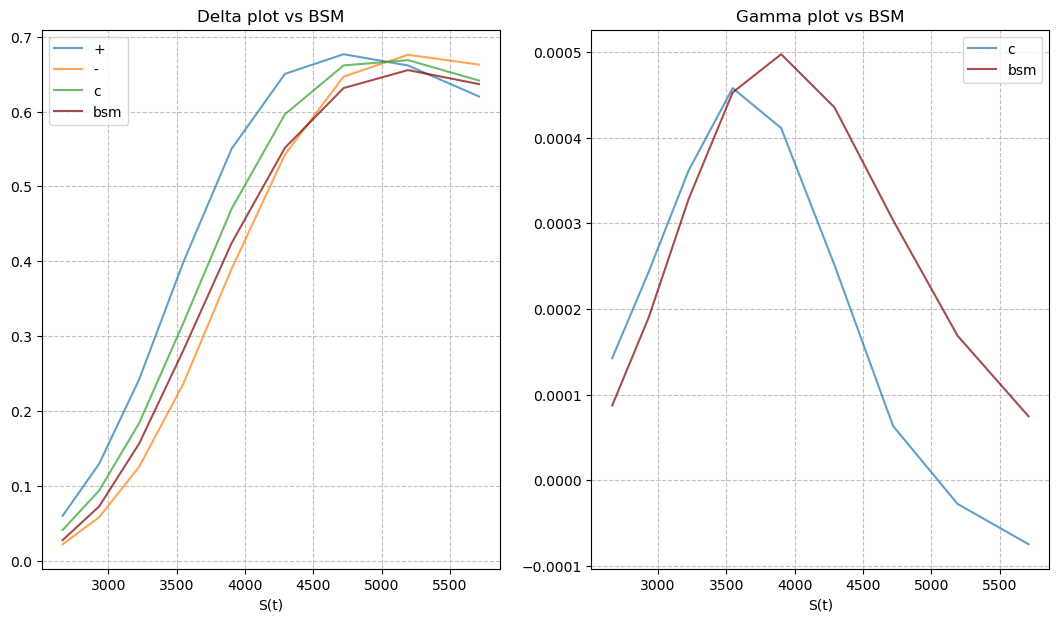

In [54]:
plot_sensitivities(0.1, bbmc_exotic)

### Bump = 0.01

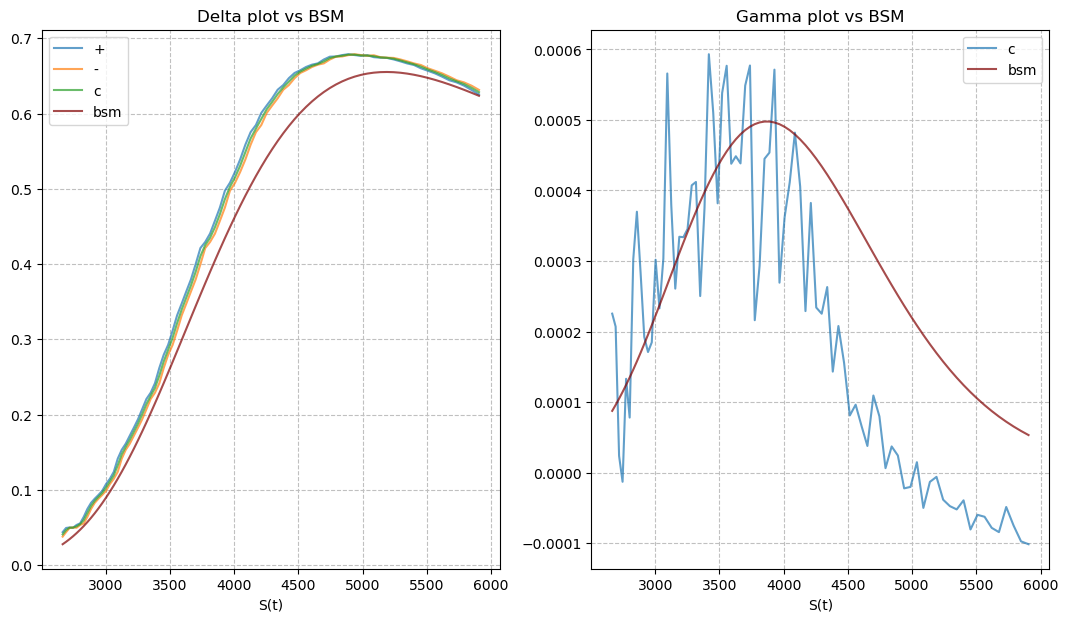

In [55]:
plot_sensitivities(0.01, bbmc_exotic)

### Bump = 0.001

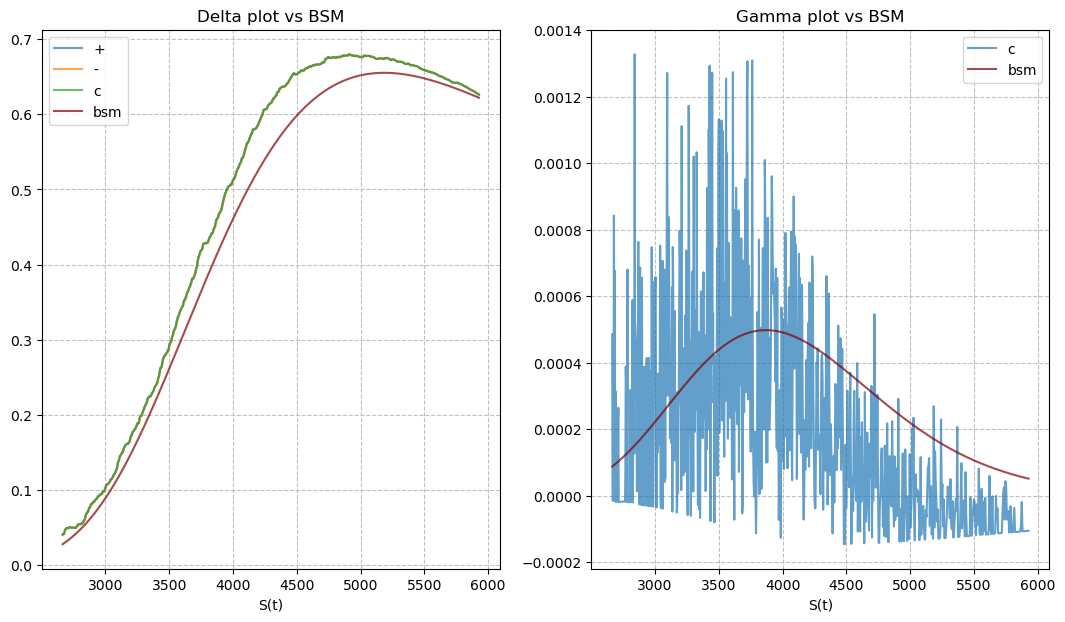

In [56]:
plot_sensitivities(0.001, bbmc_exotic)

## Observations

### Deltas
- With bumps of size 0.1 the delta_c values trend similar to BSM model however all the deltas have a wide spread. Delta- aligns best with bsm
- With bumps of size 0.01 the spreads of simulated deltas have considerably decreased. The overall spread has narrowed with the bsm model but is still significant. All three simulated deltas are not very smooth unlike the bsm curve
- With bumps of size 0.001 the simulations are extremely uneven. The delta+, delta- and delta_c values seem to have converged to one single curve.
- Overall the delta obersvations match BBMC of Q1

### Gamma
- Although there seems to be some correlation, none of the gammas track BSM model accurately


## (i) Plotting sensitivities for Control Variate MC simulations

In [65]:
# Defining some new functions for exotic simulations
def cv_exotic(S):
    global K
    St = S
    global T_t
    global sigma
    global r
    global y
    global r_y
    global z
    global alpha

    ST = St * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    ft = [(max(0, K * np.log(s/K)) - max(0, alpha * (s-K))) / (e ** (r * T_t)) for s in ST]
    
    d1 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) + ((sigma * (T_t ** 0.5))/2)
    d2 = ((np.log(St/K) + (r_y * T_t))/(sigma * (T_t ** 0.5))) - ((sigma * (T_t ** 0.5))/2)

    c = (St * (e ** ((0-y) * T_t)) * N(d1)) - (K * (e ** ((0-r) * T_t)) * N(d2))
    
    return  c + np.mean(ft)

def cv_delta(S):
    global K
    St = S
    global T_t
    global sigma
    global r
    global y
    global r_y
    global z
    global alpha
    global call
    
    ST = St * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    delta = [] 
    for s in ST:
        delta.append(K/s - alpha)
    if (St > K):
        return np.mean(delta)
    else:
        return 0

def cv_gamma(S):
    global K
    St = S
    global T_t
    global sigma
    global r
    global y
    global r_y
    global z
    global alpha
    global call
    
    ST = St * e ** ((r_y - ((sigma ** 2)/2)) * T_t + sigma * ((T_t) ** 0.5) * z)
    gamma = [] 
    for s in ST:
        gamma.append((0-K)/(s*s))
    return np.mean(gamma)

### Bump = 0.1

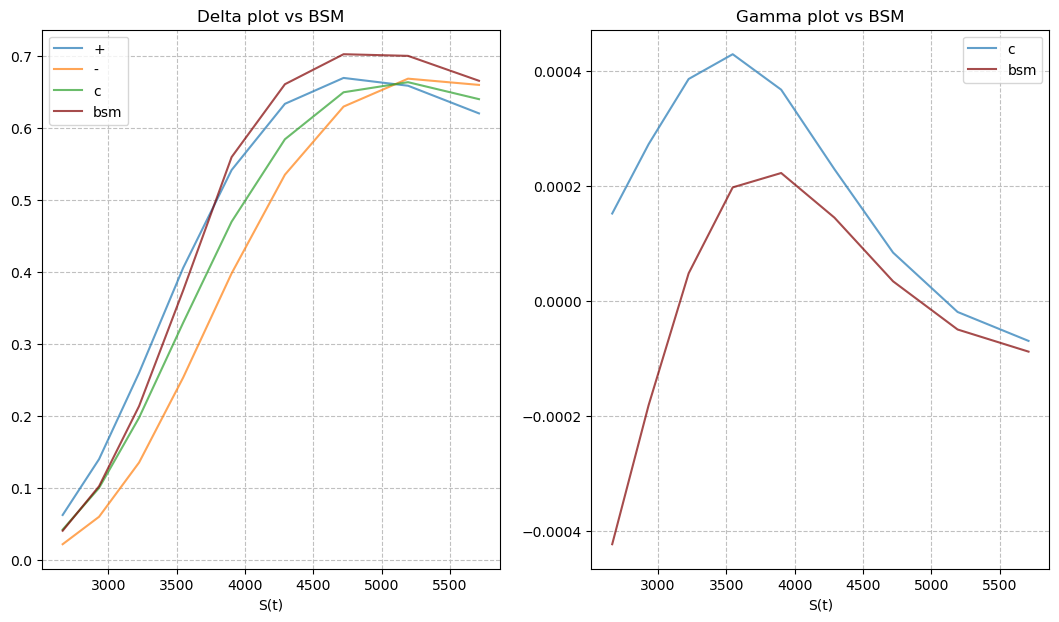

In [66]:
plot_sensitivities(0.1, cv_exotic)

### Bump = 0.01

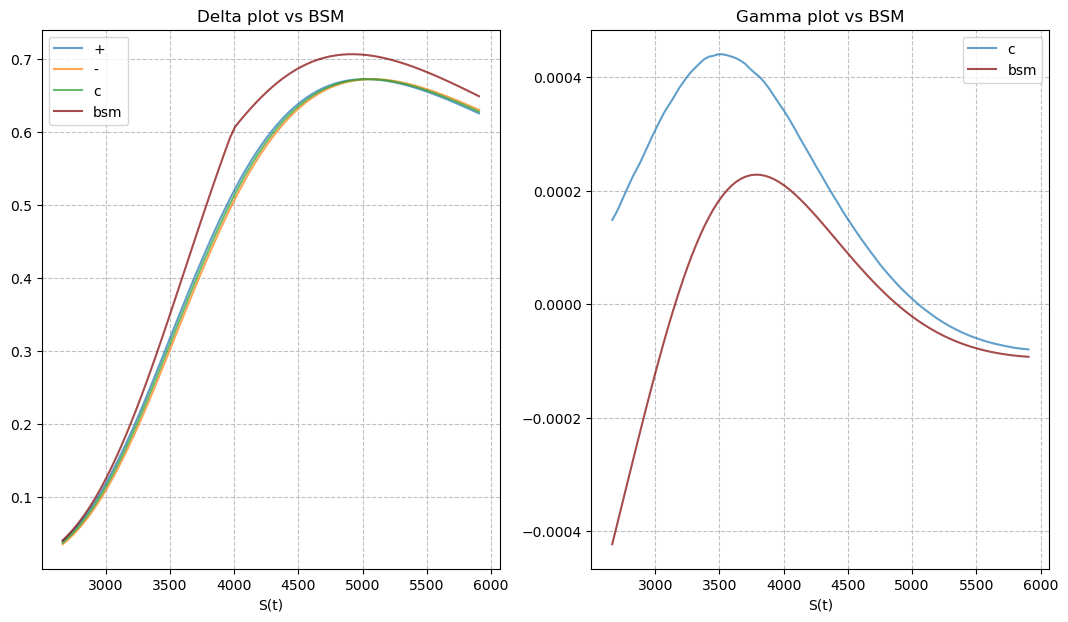

In [67]:
plot_sensitivities(0.01, cv_exotic)

### Bump = 0.001

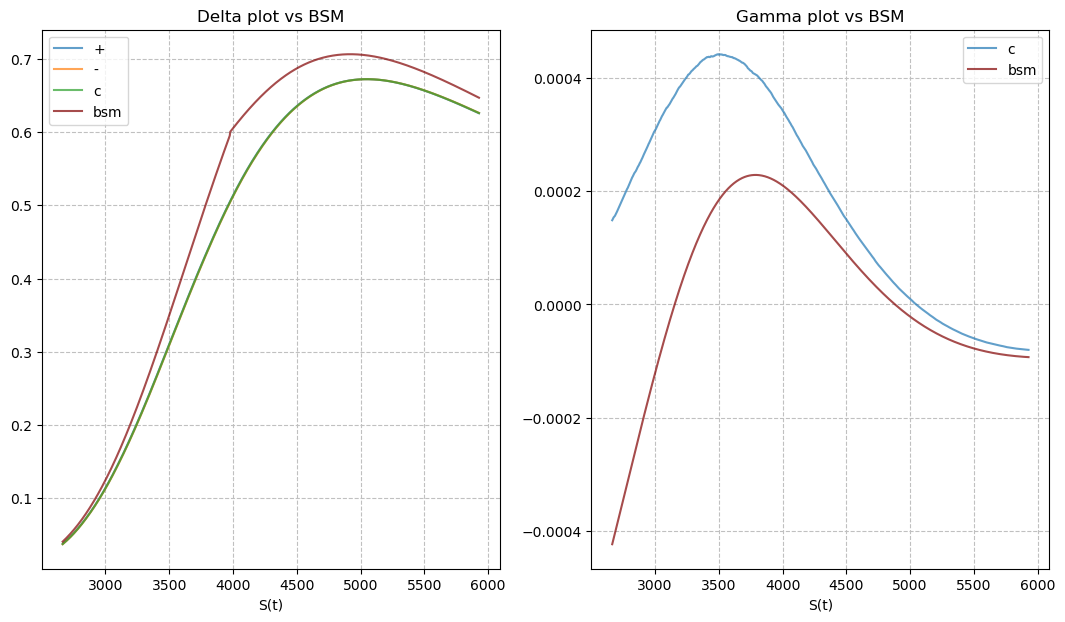

In [68]:
plot_sensitivities(0.001, cv_exotic)

## Observations

### Deltas
- The control variate deltas tread very similar to exotic call payoffs simulated using BBMC.
- The Delta functions of control variates are very smooth compared to all the other simulations because the variable component comes from the finite differencing which is very small.

### Gamma
- Control variates are the only ones with a relatively smooth gamma funtion because the variable component comes from the finite differencing which is very small.
- Seems to track the BSM better than others because major chunk of the gamma calculation is derived from BSM.

Ringe Akash Mukul
Atreyapurarpu Lalitha
Chang Wan-Hsin
Chen Zhuo
Jiang Tianchen